In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

print("All imports successful ✅")


All imports successful ✅


In [2]:
base_dir = "."

print("Current directory:", os.getcwd())
print("\nFolders here:")
print(os.listdir(base_dir))


Current directory: /Users/pavithra/Downloads/chest_xray

Folders here:
['pneumonia_detection.ipynb', 'test', 'chest_xray', '__MACOSX', 'train', '.ipynb_checkpoints', 'val']


In [3]:
for folder in ["train", "val", "test"]:
    print(f"\nInside {folder}:")
    print(os.listdir(folder))




Inside train:
['PNEUMONIA', 'NORMAL']

Inside val:
['PNEUMONIA', 'NORMAL']

Inside test:
['PNEUMONIA', 'NORMAL']


In [4]:
%pip install matplotlib



Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import os

print("Matplotlib working ✅")


Matplotlib working ✅


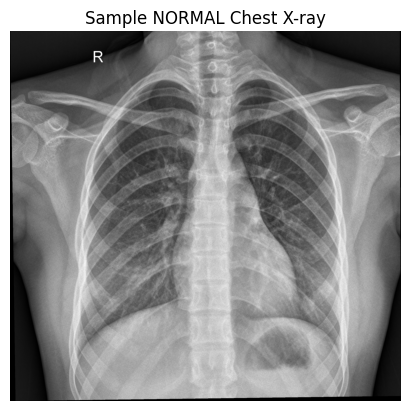

In [2]:
img_path = "train/NORMAL"

img_name = os.listdir(img_path)[0]
img = plt.imread(os.path.join(img_path, img_name))

plt.imshow(img, cmap="gray")
plt.title("Sample NORMAL Chest X-ray")
plt.axis("off")
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_gen.flow_from_directory(
    "val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Users/pavithra/pneumonia_detection/dl_env_tf/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-21 19:56:02.835435: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-01-21 19:56:02.835601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-01-21 19:56:02.835613: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-01-21 19:56:02.835886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-21 19:56:02.835899: I tensorflow/core/common_runtime/pluggable_device/pluggabl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    "val",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5


2026-01-21 19:59:14.840979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.7596 - loss: 0.6508 - val_accuracy: 0.6250 - val_loss: 0.8152
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9204 - loss: 0.2621 - val_accuracy: 0.6875 - val_loss: 0.5184
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9446 - loss: 0.1990 - val_accuracy: 0.8125 - val_loss: 0.2735
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9553 - loss: 0.1423 - val_accuracy: 0.8125 - val_loss: 0.4216
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9622 - loss: 0.1277 - val_accuracy: 0.8750 - val_loss: 0.3525


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step - accuracy: 0.9672 - loss: 0.0969 - val_accuracy: 0.8750 - val_loss: 0.3027
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.9709 - loss: 0.0950 - val_accuracy: 0.8750 - val_loss: 0.6621
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.9755 - loss: 0.0862 - val_accuracy: 0.7500 - val_loss: 0.9516
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9826 - loss: 0.0586 - val_accuracy: 0.8750 - val_loss: 0.7019
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 139ms/step - accuracy: 0.9808 - loss: 0.0581 - val_accuracy: 0.8750 - val_loss: 0.8455
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.9812 - loss: 0.0630 - val_accuracy: 0.8750 - val_loss: 0.8084
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9839 - loss: 0.0685 - val_accuracy: 0.8750 - val_loss: 0.7869
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.9804 - loss: 0

In [10]:
model.evaluate(val_generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8750 - loss: 1.0175


[1.017529010772705, 0.875]

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(
    "path_to_one_xray_image.jpg",
    target_size=(224, 224)
)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("PNEUMONIA detected")
else:
    print("NORMAL")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_one_xray_image.jpg'

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [15]:
img_path = 'chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [ ]:
plt.imshow(img)
plt.axis('off')



(-0.5, 223.5, 223.5, -0.5)

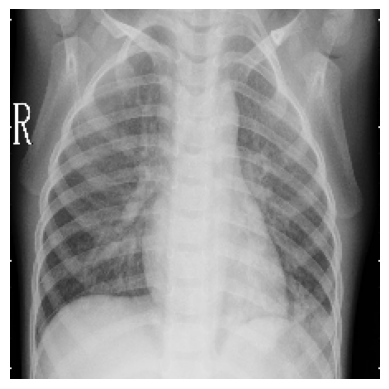

In [16]:
plt.imshow(img)
plt.axis('off')


In [17]:
prediction = model.predict(img_array)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
[[0.9999989]]


In [18]:
if prediction[0][0] > 0.5:
    print("Prediction: PNEUMONIA")
else:
    print("Prediction: NORMAL")


Prediction: PNEUMONIA


In [19]:
confidence = prediction[0][0] * 100
print(f"PNEUMONIA confidence: {confidence:.2f}%")


PNEUMONIA confidence: 100.00%


In [21]:
model.save("pneumonia_model.h5")
print("Model saved successfully")


Model saved successfully


In [22]:
model.save("pneumonia_model.keras")
